In [2]:
#!pip install netCDF4
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from datetime import datetime
import xarray as xr
from matplotlib.ticker import ScalarFormatter
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# change directory to where the file is located
folder_path = input("Enter the folder path where your file is located (e.g., 'C:/Users/lydia/Seagliders/tropics_mission/tropics_data'): ")
os.chdir(folder_path)
print(f"Changed directory to: {folder_path}")

# get filename
file_name = input("Enter the CSV file name (e.g., sg195_MOTIVE_2024_timeseries.csv): ")

# Load the dataset
df = pd.read_csv(file_name)
print(f"Successfully opened file: {file_name}")

Enter the folder path where your file is located (e.g., 'C:/Users/lydia/Seagliders/tropics_mission/tropics_data'):  C:/Users/lydia/Seagliders


Changed directory to: C:/Users/lydia/Seagliders


Enter the CSV file name (e.g., sg195_MOTIVE_2024_timeseries.csv):  sg175_May_2025_UW_OTTER_(SG175)_timeseries_cleaned.csv


Successfully opened file: sg175_May_2025_UW_OTTER_(SG175)_timeseries_cleaned.csv


In [7]:
print("Time of first dive:", df['time'][0])

answer = input("Does the day and time look right?")

if answer == "yes" or answer == "Yes":
    print(" Great! No offset is needed.")
else: 
    years = int(input("Years to add: "))
    months = int(input("Months to add: "))
    days = int(input("Days to add: "))

    # new time variable with offset
    df['new_time'] = pd.to_datetime(df['time']) + pd.DateOffset(years=years, months=months, days=days)

    print(f"Offset applied: +{years} years, +{months} months, +{days} days")
    print("New time of first dive:", df['new_time'][0])

# if the new time of the first dive isn't correct, redo it by re-running this cell!

Time of first dive: 2025-05-30 19:25:53.948999936


Does the day and time look right? no
Years to add:  0
Months to add:  0
Days to add:  0


Offset applied: +0 years, +0 months, +0 days
New time of first dive: 2025-05-30 19:25:53.948999936


In [8]:
# Extract variables
lat = df['latitude'].to_numpy()
lon = df['longitude'].to_numpy()
temp = df['temperature'].to_numpy()
salinity = df['salinity'].to_numpy()
oxygen = df['dissolved_oxygen_sat'].to_numpy()
depth = df['depth'].to_numpy()

# Convert time column to datetime and extract month
time = pd.to_datetime(df['time'])
sg_months = time.dt.month

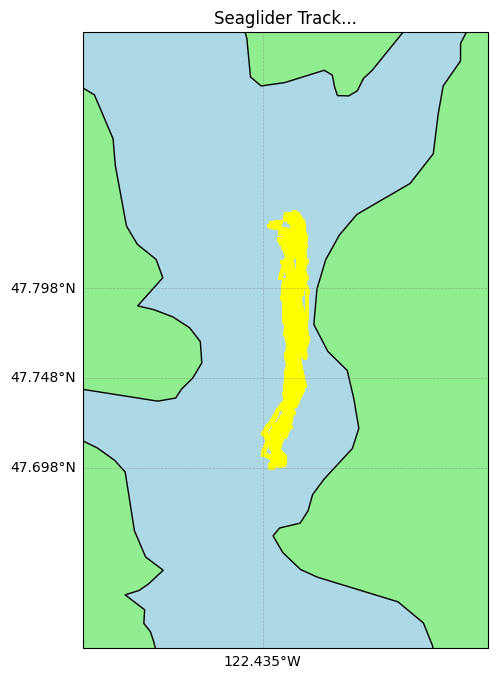

In [9]:
plt.figure(figsize=(10, 8))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid()

# Zoom in to your data bounds with a variable buffer
buffer = 0.10  # degrees
ax.set_extent([lon.min()-buffer, lon.max()+buffer,
               lat.min()-buffer, lat.max()+buffer],
              crs=ccrs.PlateCarree())

# Add gridlines
grid = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
grid.top_labels = False
grid.right_labels = False
grid.xlocator = plt.FixedLocator(np.arange(lon.min(), lon.max(), 0.05))
grid.ylocator = plt.FixedLocator(np.arange(lat.min(), lat.max(), 0.05))


# Add land and ocean
ax.add_feature(cfeature.LAND, facecolor='lightgreen')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)

# Plot your glider track
ax.scatter(lon, lat, c="yellow", s=10, marker = '_', transform=ccrs.PlateCarree())

ax.set_title("Seaglider Track...")
plt.show()


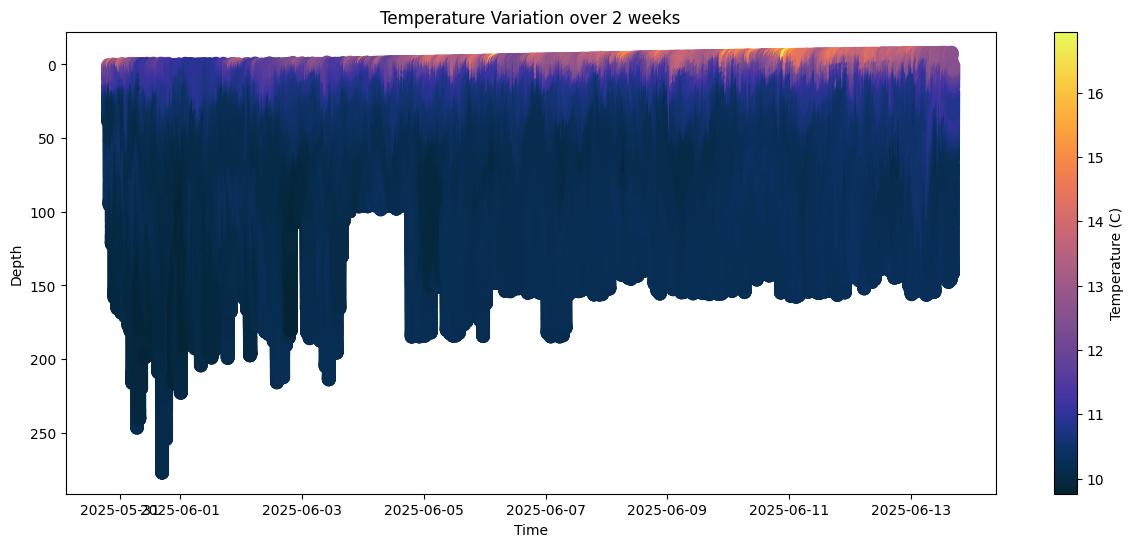

In [15]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=temp, cmap= cm.cm.thermal, s=80)
plt.colorbar(label="Temperature (C)")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Temperature Variation...")

plt.show()

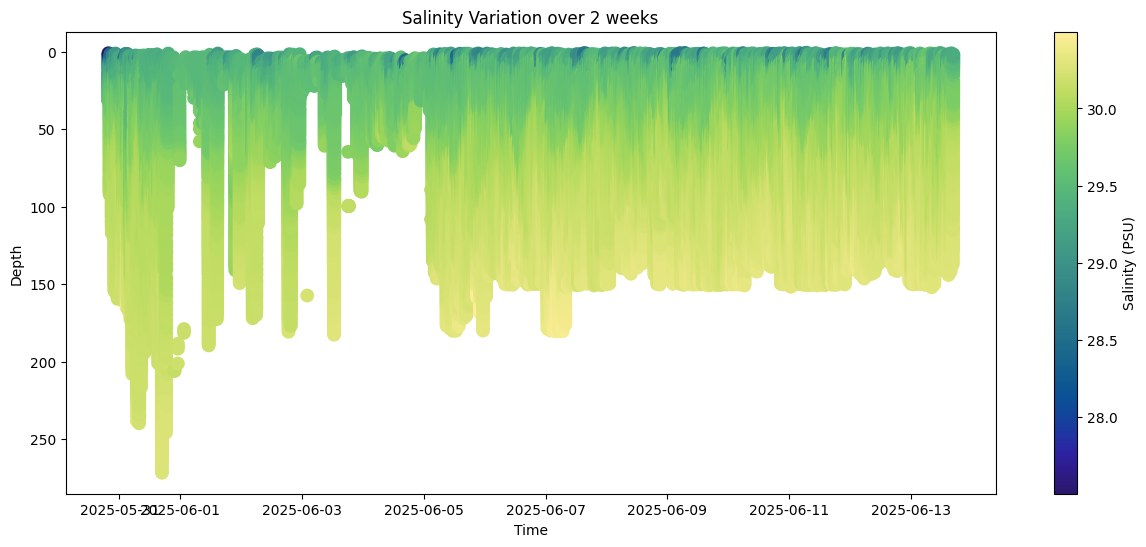

In [10]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=salinity, cmap= cm.cm.haline, s=80)
plt.colorbar(label="Salinity (PSU)")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Salinity Variation...")

plt.show()

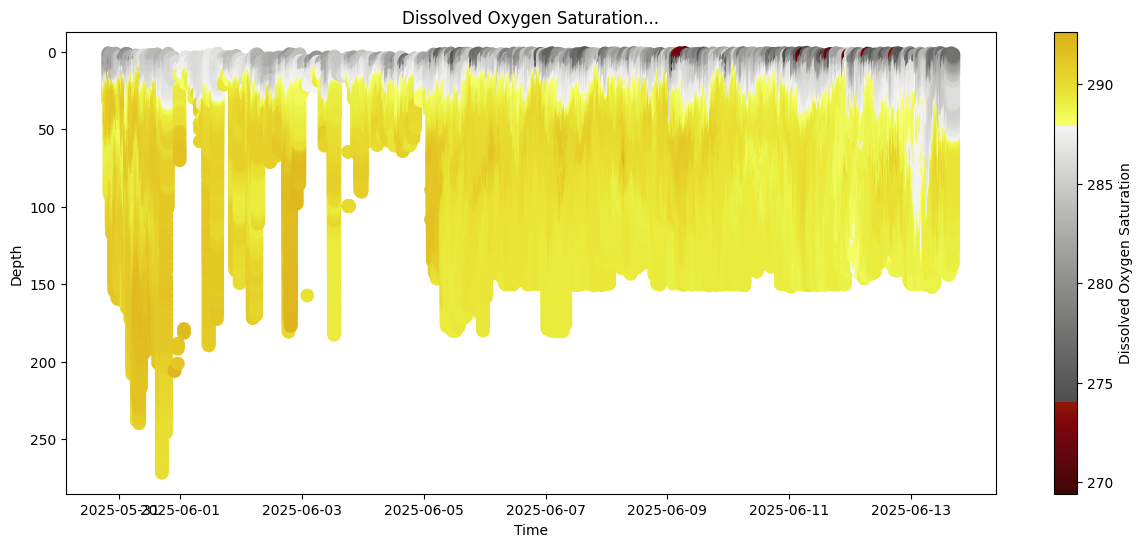

In [11]:
plt.figure(figsize=(15, 6))
scatter = plt.scatter(time, depth, c=oxygen, cmap= cm.cm.oxy, s=80)
plt.colorbar(label="Dissolved Oxygen Saturation")
plt.xlabel("Time")
plt.ylabel("Depth")
plt.gca().invert_yaxis()


plt.title("Dissolved Oxygen Saturation...")

plt.show()